In [12]:
import numpy as np
import random
import collections 
import matplotlib.pyplot as plt

In [13]:
#awards rewards based on winnings 
def check_win(configuration):
    wins = [[0,1,2,3],[4,5,6,7],[8,9,10,11],
            [12,13,14,15],[0,4,8,12],[1,5,9,13],
            [2,6,10,14],[3,7,11,15],[0,5,10,15],[3,6,9,12]]
    
    for i in range(10):
        if (configuration[wins[i][0]] == 1 and
            configuration[wins[i][1]] == 1 and
            configuration[wins[i][2]] == 1 and 
            configuration[wins[i][3]] == 1):
            return 1
    
    for i in range(10):
        if (configuration[wins[i][0]] == 2 and
            configuration[wins[i][1]] == 2 and
            configuration[wins[i][2]] == 2 and 
            configuration[wins[i][3]] == 2):
            return -1
    return 0

In [14]:
#converts the board into an integer to store the values
def state_to_key(state):
    key = 0
    for i, elem in enumerate(state):
        key += int(elem * 3**(i))
    return key

In [15]:
#returns the next and reward given a state and action
def make_move(state,action,player):
    state[action]=player
    reward=check_win(state)
    return state,reward

In [21]:
# for the mc agent to selects action based on the Q value
def mc_select_action(state,act_choices,q):
    act_chosen=-1
    q_val=-1000.0
    for act in act_choices:
        if (q[state][act]!=0 and q[state][act]>q_val):
            q_val=q[state][act]
            act_chosen=act
    if (act_chosen<0):
        act_chosen = random.choice(act_choices)
        
    return act_chosen

In [22]:
#agent is playing based on the trained q values
def play_using_q(q):
    global win_list, loss_list, tie_list
    wins = 0 
    loss = 0 
    tie = 0 
    
    for i in range(1000):
        state = np.zeros(16)
        action_choices = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
        player=random.choice([0,1])
        reward=0
        while(len(action_choices)>0 and reward==0):
            player=player%2+1
            if (player==1):
                action = mc_select_action(state_to_key(state),action_choices,q) 
            else:
                action = random.choice(action_choices) 
            action_choices.remove(action)   
            new_state,reward=make_move(state,action,player)  
            
        if (reward==1):
            wins+=1
        elif (reward==-1):
            loss+=1
        else:
            tie+=1
            
    total=wins+loss+tie
    win_pct=round(100*wins/total,2)
    loss_pct=round(100*loss/total,2)
    tie_pct=round(100*tie/total,2)
    if total>0:
        win_list.append(win_pct)
        loss_list.append(loss_pct)
        tie_list.append(tie_pct)
    print("   wins: ",win_pct,"; loss: ", loss_pct,"; tie: ",tie_pct)

In [23]:
#training function under 6 million episodes
def monte_carlo_control(pi,Q,Counts):
    global x_axis
    episode=[]
    for i in range(6000001):
        state = np.zeros(16)
        action_choices = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
        player=random.choice([0,1])
        reward=0
        episode=[]
        rewards=[]
        while(len(action_choices)>0 and reward==0):
            player=player%2+1
            state_key=state_to_key(state)
            action =  random.choice(action_choices)
            action_choices.remove(action)   
            new_state,reward=make_move(state,action,player) 
            episode.append((state_key,action))
            rewards.append(reward)
            state=new_state
            
        G=0
        for j,(s,a) in enumerate(reversed(episode)):
            ind_frw=len(rewards)-j-1
            reward=rewards[ind_frw]
            G+=reward
            if (s,a) not in episode[:ind_frw]:
                Counts[s][a] += 1
                Q[s][a] += (G-Q[s][a])/Counts[s][a]

        if (i>0 and (i%100000==0 or i==5 or i==10000 or i==50000)):
            print("After ",i," episodes: ")
            x_axis.append(i)
            play_using_q(Q)

In [24]:
win_list=[]
loss_list=[]
tie_list=[]
x_axis=[]
pi = np.zeros([3**16,16])
Counts = np.zeros([3**16,16])
Q = np.zeros([3**16,16])
myQ=monte_carlo_control(pi,Q,Counts)

After  5  episodes: 
   wins:  26.3 ; loss:  30.5 ; tie:  43.2
After  10000  episodes: 
   wins:  30.1 ; loss:  31.8 ; tie:  38.1
After  50000  episodes: 
   wins:  30.1 ; loss:  26.3 ; tie:  43.6
After  100000  episodes: 
   wins:  34.3 ; loss:  26.1 ; tie:  39.6
After  200000  episodes: 
   wins:  33.7 ; loss:  27.7 ; tie:  38.6
After  300000  episodes: 
   wins:  35.1 ; loss:  25.6 ; tie:  39.3
After  400000  episodes: 
   wins:  36.2 ; loss:  26.5 ; tie:  37.3
After  500000  episodes: 
   wins:  34.9 ; loss:  24.1 ; tie:  41.0
After  600000  episodes: 
   wins:  34.4 ; loss:  25.2 ; tie:  40.4
After  700000  episodes: 
   wins:  34.8 ; loss:  26.0 ; tie:  39.2
After  800000  episodes: 
   wins:  37.9 ; loss:  25.5 ; tie:  36.6
After  900000  episodes: 
   wins:  36.5 ; loss:  27.5 ; tie:  36.0
After  1000000  episodes: 
   wins:  35.8 ; loss:  27.0 ; tie:  37.2
After  1100000  episodes: 
   wins:  40.1 ; loss:  25.5 ; tie:  34.4
After  1200000  episodes: 
   wins:  39.4 ; loss:  26

[26.3, 30.1, 30.1, 34.3, 33.7, 35.1, 36.2, 34.9, 34.4, 34.8, 37.9, 36.5, 35.8, 40.1, 39.4, 41.6, 38.4, 41.8, 38.4, 38.4, 40.6, 42.0, 38.0, 38.7, 36.3, 38.5, 37.9, 40.1, 41.7, 40.6, 39.5, 41.2, 38.7, 39.4, 39.4, 41.3, 42.8, 46.5, 42.9, 43.8, 44.5, 45.3, 43.0, 46.2, 41.6, 45.7, 41.8, 42.3, 45.4, 44.5, 47.2, 45.4, 48.1, 48.3, 44.1, 46.6, 43.3, 43.8, 44.5, 46.7, 45.5, 45.3, 44.1]
[30.5, 31.8, 26.3, 26.1, 27.7, 25.6, 26.5, 24.1, 25.2, 26.0, 25.5, 27.5, 27.0, 25.5, 26.0, 25.9, 25.1, 24.3, 26.9, 25.3, 24.0, 25.3, 24.1, 26.4, 25.9, 27.0, 28.2, 28.3, 28.0, 23.8, 26.4, 27.0, 28.8, 26.7, 26.9, 27.8, 26.7, 21.4, 25.5, 24.8, 23.0, 23.7, 24.9, 24.1, 25.9, 23.8, 23.9, 26.4, 25.4, 23.9, 21.8, 24.1, 25.2, 24.2, 24.1, 25.0, 25.3, 25.5, 24.3, 23.0, 26.9, 22.8, 25.3]
[43.2, 38.1, 43.6, 39.6, 38.6, 39.3, 37.3, 41.0, 40.4, 39.2, 36.6, 36.0, 37.2, 34.4, 34.6, 32.5, 36.5, 33.9, 34.7, 36.3, 35.4, 32.7, 37.9, 34.9, 37.8, 34.5, 33.9, 31.6, 30.3, 35.6, 34.1, 31.8, 32.5, 33.9, 33.7, 30.9, 30.5, 32.1, 31.6, 31.4, 3

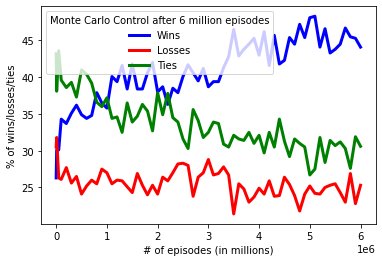

In [26]:
print(win_list)
print(loss_list)
print(tie_list)
print(x_axis)
plt.plot(x_axis,win_list,color='blue',linewidth=3,label='Wins')
plt.plot(x_axis,loss_list,color='red',linewidth=3,label='Losses')
plt.plot(x_axis,tie_list,color='green',linewidth=3,label='Ties')
plt.legend(title='Monte Carlo Control after 6 million episodes')
plt.xlabel("# of episodes (in millions)")
plt.ylabel("% of wins/losses/ties")
plt.show()